In [7]:
ENV["JULIA_PKG_SERVER"] = ""
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples`


### 1. Generate Random Data

In [8]:
rng = Random.default_rng()

type="ColTable"
num_rows = 100
num_features = 2
class_probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; min_sep=0.1,  class_probs, type, insert_y=y_ind, rng=32)
X, y = generate_imbalanced_data(num_rows, num_features; min_sep=0.1, class_probs, type, rng=32)

((Column1 = [0.41171366000712917, 0.242391366171351, 0.055754915871404506, 0.19060271882603236, 0.45511587243360113, 0.46159769891580993, 0.3762847331654681, 0.20517747385087315, 0.10492247842192944, 0.5700070868209465  …  0.526862289956694, 0.5174031777013629, 0.2781239667652494, 0.44700560615586993, 0.5466027608558182, 0.18520709399176954, 0.2504684517884898, 0.38428927441443583, 0.5379617245397954, 0.3725728047560396], Column2 = [0.483031050573458, 0.08765249492631264, 0.49694874731299027, 0.6393622904755082, 0.33829304268552884, 0.27489296981306593, 0.746552754013049, 0.5140814265080687, 0.5890269409597291, -0.018898189188959844  …  0.10869910901771249, -0.0048843993520937545, 0.801301971961647, -0.027911081856169105, -0.07629045357533878, 0.35217612832164646, -0.0766166050052216, 0.008276503513308275, 0.4613983585891744, 0.3209604262035518]), CategoricalValue{Int64, UInt32}[1, 1, 0, 0, 1, 1, 1, 0, 0, 2  …  2, 2, 1, 2, 2, 0, 0, 1, 0, 0])

### 2. Apply BorderlineSMOTE1

#### Using Imbalance Only

In [9]:
Xover, yover = borderline_smote1(X, y; m = 10, k = 5, ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

┌ Info: After filtering, the mapping from each class to number of borderline points is (0 => 15, 1 => 19).
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/oversampling_methods/borderline_smote1/borderline_smote1.jl:187


((Column1 = [0.41171366000712917, 0.242391366171351, 0.055754915871404506, 0.19060271882603236, 0.45511587243360113, 0.46159769891580993, 0.3762847331654681, 0.20517747385087315, 0.10492247842192944, 0.5700070868209465  …  0.4320753216743469, 0.35739827156066895, 0.37513500452041626, 0.4863850474357605, 0.2476024031639099, 0.3668586313724518, 0.34134605526924133, 0.3672422766685486, 0.3635734021663666, 0.3734007775783539], Column2 = [0.483031050573458, 0.08765249492631264, 0.49694874731299027, 0.6393622904755082, 0.33829304268552884, 0.27489296981306593, 0.746552754013049, 0.5140814265080687, 0.5890269409597291, -0.018898189188959844  …  0.2568473517894745, 0.35687780380249023, 0.3303269147872925, 0.4387916624546051, -0.05402107536792755, 0.2018757462501526, 0.09840619564056396, 0.30207428336143494, 0.3627104163169861, 0.1913042664527893]), CategoricalValue{Int64, UInt32}[1, 1, 0, 0, 1, 1, 1, 0, 0, 2  …  1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Using MLJ

In [10]:
smote_model = Imbalance.MLJ.BorderlineSMOTE1(m=4, k=5, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(smote_model)
Xover, yover = transform(mach, X, y)

┌ Info: After filtering, the mapping from each class to number of borderline points is (0 => 12, 2 => 2, 1 => 7).
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/oversampling_methods/borderline_smote1/borderline_smote1.jl:187
┌ Warning: Warning: k=5 is  larger than or equal to the number of samples for the data which is (2). Will set k=2-1
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/oversampling_methods/smote/smote.jl:102


((Column1 = [0.41171366000712917, 0.242391366171351, 0.055754915871404506, 0.19060271882603236, 0.45511587243360113, 0.46159769891580993, 0.3762847331654681, 0.20517747385087315, 0.10492247842192944, 0.5700070868209465  …  0.4446735084056854, 0.4409889578819275, 0.44584164023399353, 0.4417421221733093, 0.4451516270637512, 0.4458354711532593, 0.4415499269962311, 0.44532984495162964, 0.4408130645751953, 0.439992755651474], Column2 = [0.483031050573458, 0.08765249492631264, 0.49694874731299027, 0.6393622904755082, 0.33829304268552884, 0.27489296981306593, 0.746552754013049, 0.5140814265080687, 0.5890269409597291, -0.018898189188959844  …  -0.008365337736904621, 0.02251571975648403, -0.018155623227357864, 0.016203293576836586, -0.012372437864542007, -0.018104014918208122, 0.017814014106988907, -0.013866257853806019, 0.023989783599972725, 0.030864905565977097]), CategoricalValue{Int64, UInt32}[1, 1, 0, 0, 1, 1, 1, 0, 0, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Using TableTransforms

In [11]:
using Imbalance: TableTransforms.BorderlineSMOTE1
smote_model_t = BorderlineSMOTE1(y_ind, m=4, k=5, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
Xyover = Xy |> smote_model_t

┌ Info: After filtering, the mapping from each class to number of borderline points is (0.0 => 7, 1.0 => 11).
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/oversampling_methods/borderline_smote1/borderline_smote1.jl:187


(Column1 = [0.3449996355974587, 0.3233736140399372, -0.01183973458433736, 0.15847832812095608, 0.3513808802040998, 0.31995488850226733, 0.4204390041949482, 0.503150632149858, -0.40214464214516427, 0.5527135630719259  …  0.3444315195083618, 0.48340120911598206, 0.5107583999633789, 0.44283562898635864, 0.5865938663482666, 0.5477305054664612, 0.43734899163246155, 0.5962690711021423, 0.4969671964645386, 0.49701955914497375],
 Column2 = [0.48105590708166734, 0.08667359780903339, 0.43179874604028295, 0.47895423720770797, 0.3319561136627137, 0.54966426039793, 0.5671886800691417, 0.21740792578233287, 0.5541374992549477, 0.08133572193546378  …  0.4552547335624695, 0.3572889566421509, 0.3868061602115631, 0.39271068572998047, 0.5647913813591003, 0.5434255599975586, 0.37965014576911926, 0.5521711707115173, 0.4156450629234314, 0.4008144736289978],
 Column3 = [1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0  …  1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],)

### 3. Plot the Results

   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


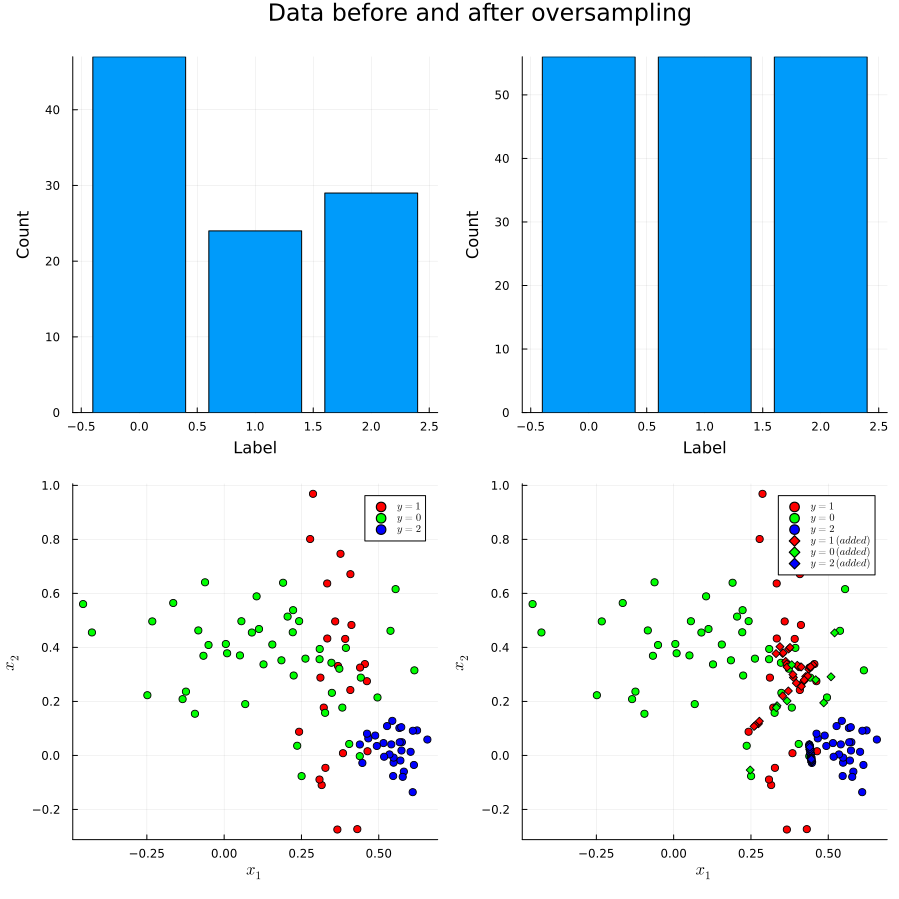

In [12]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, yover, X, Xover)